In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_name = "../src/"+input("Podaj nazwe pliku z danymi: ")

#file_name = "..\\src\\"+input("Podaj nazwe pliku z danymi: ")
data_frame = pd.read_csv(file_name,sep="\s+",header=None,engine="python")

print(data_frame)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_25099/3867560006.py:4: SyntaxWarning: invalid escape sequence '\s'
  data_frame = pd.read_csv(file_name,sep="\s+",header=None,engine="python")


            0
0      -0.145
1      -0.145
2      -0.145
3      -0.145
4      -0.145
...       ...
649995 -0.075
649996 -0.445
649997 -0.675
649998 -0.765
649999 -1.280

[650000 rows x 1 columns]


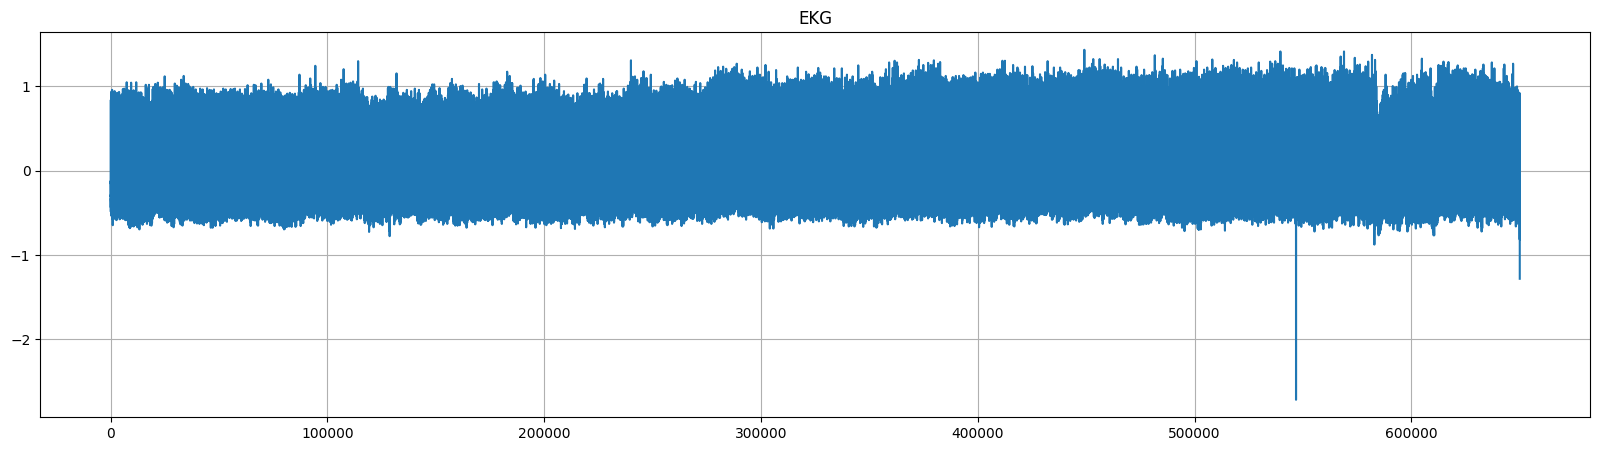

In [ ]:

data_frame.columns = ['data']
font = {'size':20}
plt.figure(figsize=(20,5))
plt.plot(data_frame['data'])
plt.grid(True)
plt.title("EKG")
plt.show()


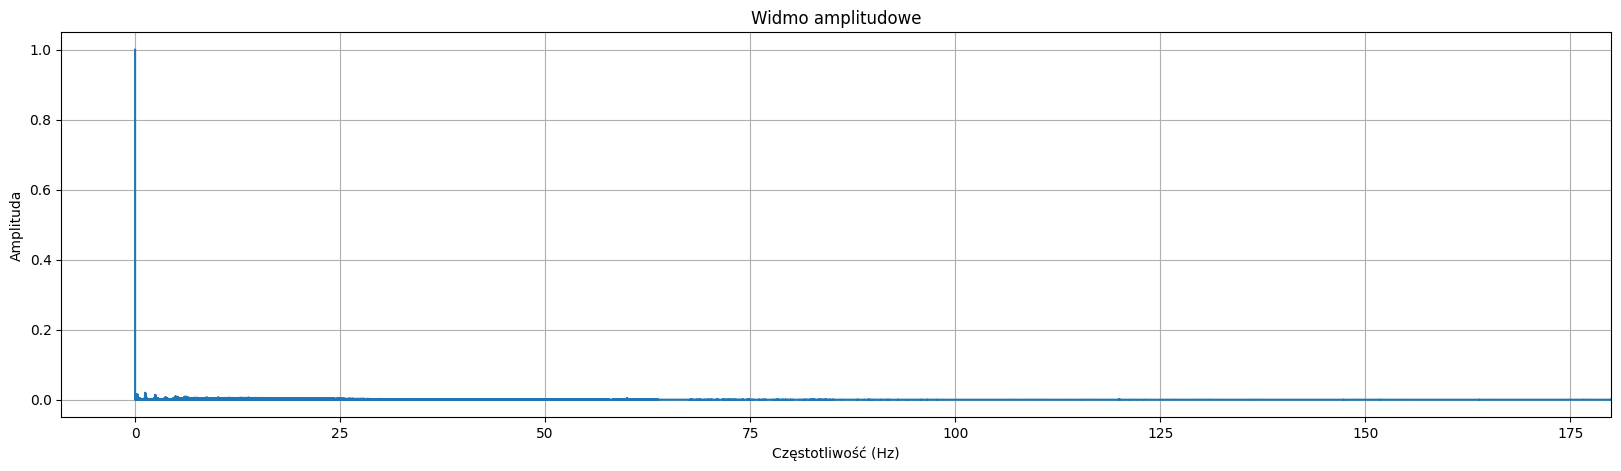

In [ ]:
fs = 360
t = len(data_frame)

fourier1 = np.fft.fft(data_frame['data'])

widmo = np.abs(fourier1)
abs_widmo = widmo / np.max(widmo)
freq = np.fft.fftfreq(t,1/fs)
pos_freq = freq[:len(freq)//2]
pos_widmo = abs_widmo[:len(abs_widmo)//2]

plt.figure(figsize=(20,5))
plt.plot(pos_freq,pos_widmo)
plt.xlim(right = fs/2)
plt.grid(True)
plt.title("Widmo amplitudowe")
plt.xlabel('Częstotliwość (Hz)')
plt.ylabel('Amplituda')

plt.show()


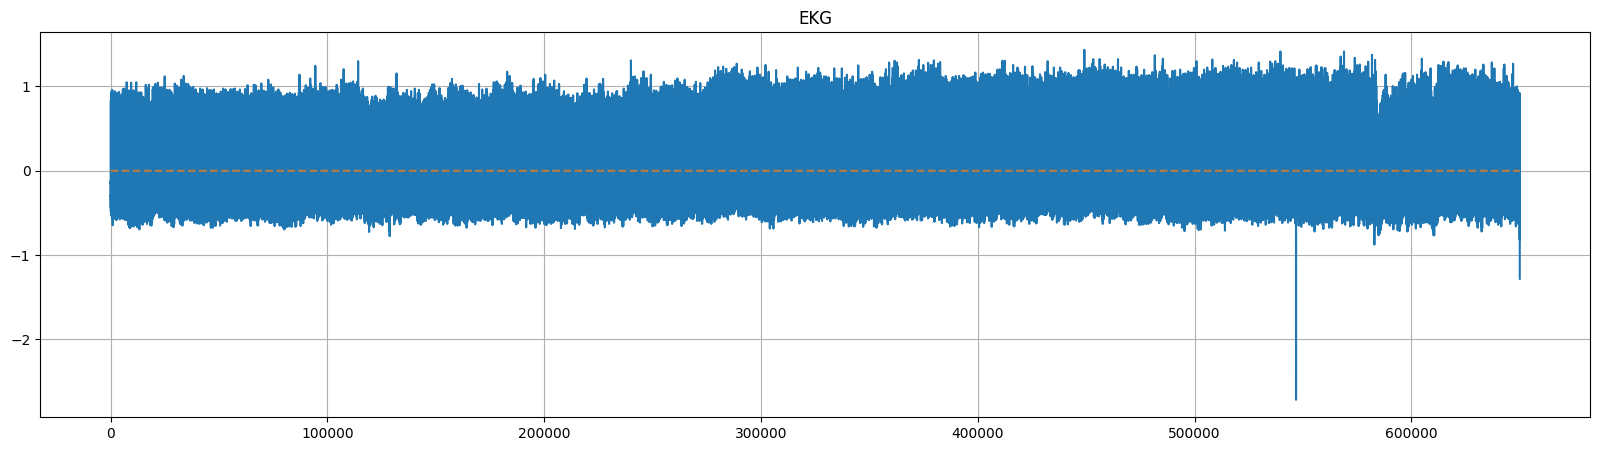

In [19]:
inv_fourier = np.fft.ifft(fourier1).real
inv_fourier = data_frame['data'] - inv_fourier
plt.figure(figsize=(20,5))
plt.plot(data_frame['data'])
plt.plot(inv_fourier, linestyle="dashed", alpha=0.7)
plt.grid(True)
plt.title("EKG")
plt.show()
